# Exercise 1

**Due date:** 29.04.2025, 23:59

**Learning goals:** reading and annotating images, estimating 2D transformations, applying 2D transformations

In [1]:
import os
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import napari
from skimage.transform import estimate_transform, warp

In [2]:
ressource_folder = './resources/tiff'
load_points = True

## Task 1: Read Images and Visualize

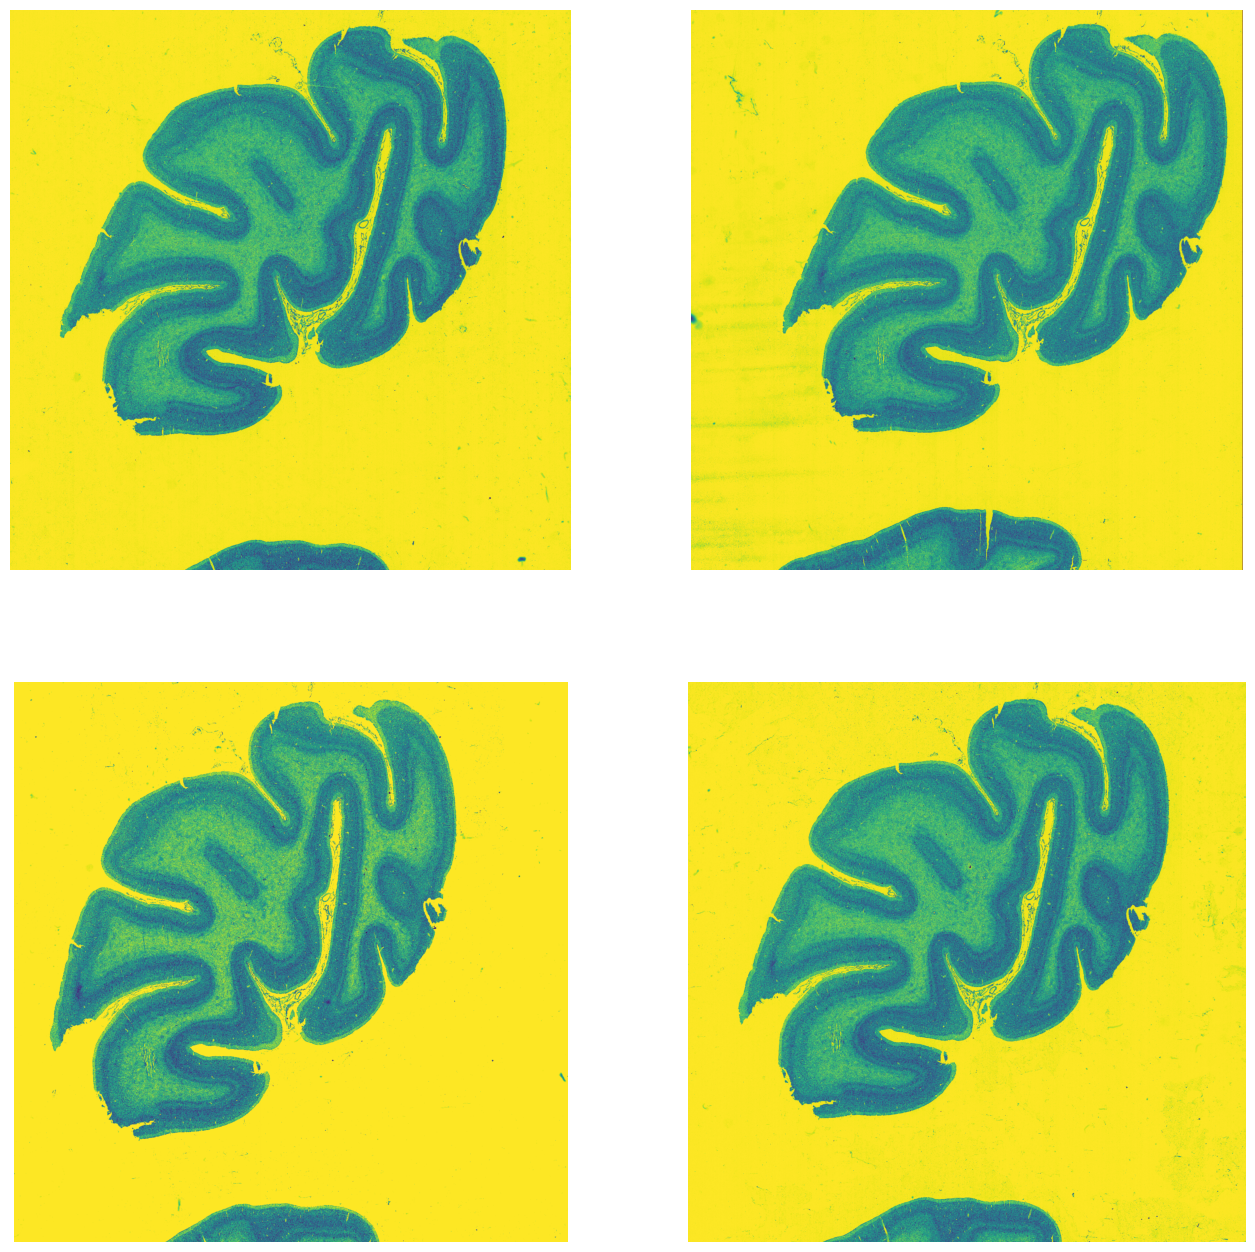

In [3]:
def read_images(path):
    return [iio.imread(os.path.join(path, file)) for file in os.listdir(path)]


images = read_images(ressource_folder)

_, axes = plt.subplots(2, 2, figsize=(16, 16))
for image, ax in zip(images[:4], axes.flatten()):
    ax.imshow(image)
    ax.axis('off')
plt.show()

## Task 2: Simple Statistics

In [4]:
type(images[0])

numpy.ndarray

In [5]:
# images = np.array(images) # throws error
# shapes seem to differ on width dimension

In [6]:
# only 1 channel (i.e., gray-scale)
min_width, max_width = min(image.shape[1] for image in images), max(image.shape[1] for image in images)
min_width, max_width

(1599, 1844)

In [7]:
# crop all of them to minimum for simpler batch analysis
images = np.array([image[:, :min_width] for image in images])
images.shape

(27, 1700, 1599)

In [8]:
images.min(), images.max(), images.mean(), np.median(images)

(np.uint8(4), np.uint8(255), np.float64(205.07063063652257), np.float64(250.0))

In [9]:
# images are on a 0-255 scale
# assuming 0 to be black and 255 as white; the images are mostly white

## Task 3: Manually Identify pairs of corresponding points

In [10]:
os.makedirs('./out', exist_ok=True)
points_path = lambda i: f'./out/points_img{i}.npy'

img1, img2 = images[:2]

In [11]:
def select_points(img1, img2):
    viewer = napari.Viewer()

    viewer.add_image(img1, name='Image 1')
    points_layer_img1 = viewer.add_points(name='Points Image 1')

    shift = img1.shape[1] + 50
    viewer.add_image(img2, name='Image 2', translate=(0, shift))
    points_layer_img2 = viewer.add_points(name='Points Image 2', translate=(0, shift))

    napari.run()

    return points_layer_img1, points_layer_img2

In [12]:
if not load_points: points_layer_img1, points_layer_img2 = select_points(img1, img2)

### 🛑 Continue only after finishing the annotation.

In [13]:
if load_points:
    points_img1 = np.load(points_path(1))
    points_img2 = np.load(points_path(2))
else:
    points_img1 = points_layer_img1.data
    points_img2 = points_layer_img2.data

    np.save(points_path(1), points_img1)
    np.save(points_path(2), points_img2)

In [14]:
points_img1.shape, points_img2.shape

((8, 2), (8, 2))

## Task 4: Calculate Transformations

In [15]:
rigid_transform = estimate_transform('similarity', src=points_img1, dst=points_img2)
affine_transform = estimate_transform('affine', src=points_img1, dst=points_img2)

In [16]:
rigid_transform

<SimilarityTransform(matrix=
    [[ 9.98178036e-01,  7.26997100e-03, -1.46701298e+01],
     [-7.26997100e-03,  9.98178036e-01,  1.32302044e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x11ae6fcb0>

In [17]:
affine_transform

<AffineTransform(matrix=
    [[ 1.00021704e+00,  9.46484251e-04, -1.13954596e+01],
     [-1.71853104e-02,  9.93226891e-01,  1.43557732e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x11ae6fb60>

In [18]:
rigid_aligned_img1 = warp(img1, rigid_transform.inverse)
affine_aligned_img1 = warp(img1, affine_transform.inverse)

## Task 5: Display Transformations

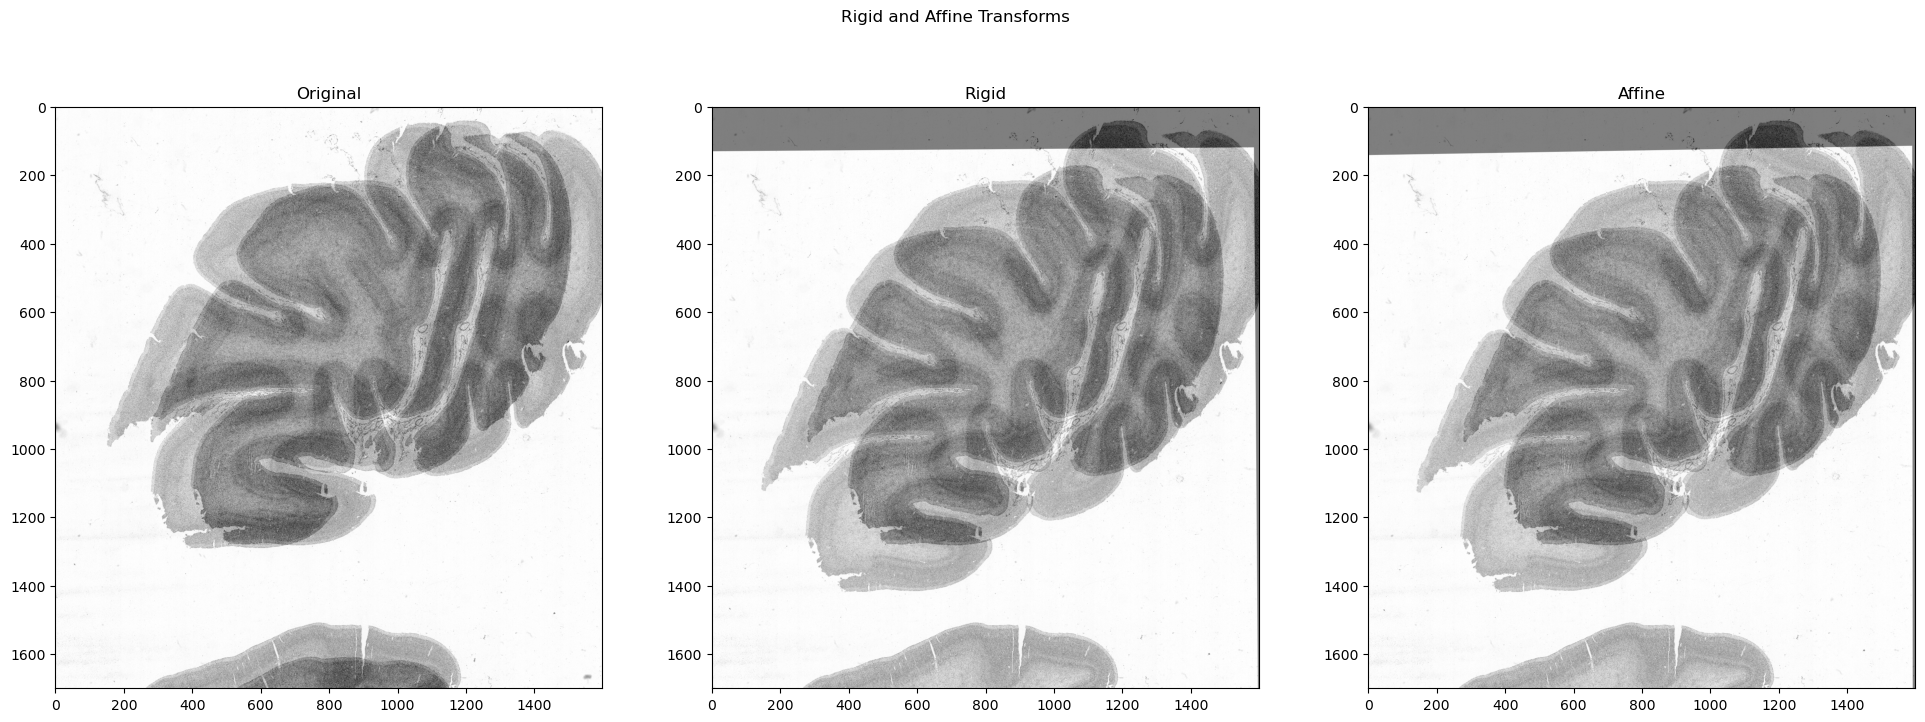

In [19]:
fig, axes = plt.subplots(ncols=3, figsize=(24, 8))

fig.suptitle('Rigid and Affine Transforms')

axes[0].grid(False)
axes[0].set_title('Original')
axes[0].imshow(img2, cmap='gray')
axes[0].imshow(img1, cmap='gray', alpha=0.5)

axes[1].grid(False)
axes[1].set_title('Rigid')
axes[1].imshow(img2, cmap='gray')
axes[1].imshow(rigid_aligned_img1, cmap='gray', alpha=0.5)

axes[2].grid(False)
axes[2].set_title('Affine')
axes[2].imshow(img2, cmap='gray')
axes[2].imshow(affine_aligned_img1, cmap='gray', alpha=0.5)
plt.show()

This is somehow the result I keep getting... Instead of shifting right, it shifts down.